Figure(900x700)


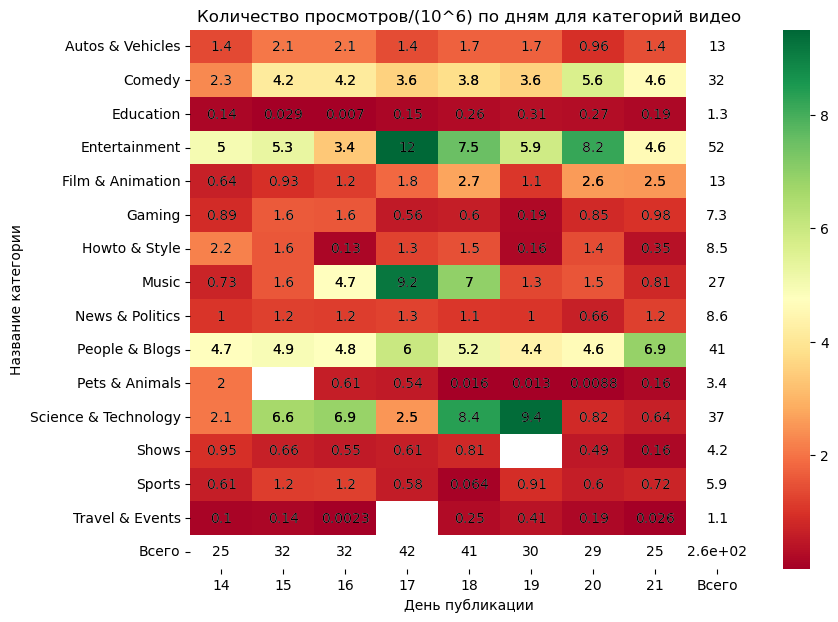

In [1]:
import json
import typing as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib.figure import Figure


class YouTube2:
    def __init__( # task0
        self,
        trends_df_path: str="RUvideos_short.csv",
        categories_df_path: str="RU_category_id.json"
    ):
        self.trends_df = pd.read_csv(trends_df_path, delimiter=',')
        self.trends_df['trending_date'] = pd.to_datetime(self.trends_df['trending_date'], format="%y.%d.%m") 
        # пример как было: 17.14.11 
        self.trends_df["trending_date"] = self.trends_df["trending_date"].astype("datetime64").dt.strftime('%Y-%d-%m')
        self.trends_df['trending_date'] = pd.to_datetime(self.trends_df['trending_date'], format="%Y-%d-%m") 
        # пример как стало: 2017-14-11 

        with open(categories_df_path) as json_file:
            json_data = json.load(json_file)
          
        self.categories_df = pd.DataFrame(columns=['id', 'name'])

        for item in json_data['items']:
            self.categories_df = self.categories_df.append(
                {'id': int(item['id']),
                'name': item['snippet']['title']},
                ignore_index=True
            )
          
        self.categories_df['id'] = self.categories_df['id'].astype(int)

    # Объединяем две таблицы на основе индекса категории.
    def task1(self) -> pd.DataFrame:
        self.categories_df["category_id"] = self.categories_df["id"].astype(int)
        data = pd.merge(left=self.trends_df, right=self.categories_df, how='inner', on= 'category_id')
        data['id'] = data['category_id']
        return data
    
    # Составляем сводную таблицу о количестве просмотров по дням для каждой категории видео. Пропуски не заменяем.
    def task2(self) -> pd.DataFrame:
        return pd.pivot_table(data=self.task1(), values='views', index='name', columns='trending_date', aggfunc=np.sum)

    # Визуализируем таблицу с помощью heatmap. Для информативности делим все числа на 1000000.
    def task3(self) -> Figure:
        data_with_new_views=self.task1()
        # Для количество просмотров делим все числа на 1000000.
        data_with_new_views['views'] = data_with_new_views['views']/1000000
        # Меняем формат отображения даты на красивый.
        data_with_new_views['trending_date'] = data_with_new_views['trending_date'].astype("string")
        pivot_table = pd.pivot_table(data=data_with_new_views, values='views', index='name', columns='trending_date', aggfunc=np.sum)

        f, ax = plt.subplots(figsize=(9, 7))
        figure = sns.heatmap(data=pivot_table, annot=True)
        figure.set_title("Количество просмотров/(10^6) по дням для категорий видео")
        return plt.gcf()

    # Делаем аналогичную task2 сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".
    # Пропуски не заменяем
    def task4(self) -> pd.DataFrame:
        return pd.pivot_table(data=self.task1(), values='views', index='name', columns='trending_date', aggfunc=np.sum, margins= True , margins_name='Всего просмотров')

    # Визуализируем таблицу с помощью heatmap. Для информативности делим все числа на 10^6.
    # При построении, аналогичном task3, график получается неинформативным. Исправляем это.
    def task5(self) -> Figure:
        data_with_new_views= data=self.task1()
        # Для количество просмотров делим все числа на 1000000.
        data_with_new_views['views'] = data_with_new_views['views']/1000000
        # Меняем формат отображения даты на красивый.
        data_with_new_views["trending_date"] = data_with_new_views["trending_date"].astype("datetime64").dt.strftime('%d')
        data_with_new_views['trending_date'] = data_with_new_views['trending_date'].astype("string")
        pivot_table = pd.pivot_table(data=data_with_new_views, values='views', index='name', columns='trending_date', aggfunc=np.sum, margins= True , margins_name='Всего')

        mask = np.zeros((16, 9))
        mask[:,8] = True
        mask[15,:] = True
        f, ax = plt.subplots(figsize=(9, 7))
        figure = sns.heatmap(data=pivot_table, mask=mask, annot=True, vmax=9.5, cmap='RdYlGn')
        figure2 = sns.heatmap(data=pivot_table, alpha=0, cbar=False, annot=True, annot_kws={"size": 10, "color":"black"}, cmap='RdYlGn')
        figure.set_title("Количество просмотров/(10^6) по дням для категорий видео")
        figure.set_xlabel("День публикации")
        figure.set_ylabel("Название категории")
        return plt.gcf()
    
new_youTube2 = YouTube2()
#print(new_youTube2.task1())
#print(new_youTube2.task2())
#print(new_youTube2.task3())
#print(new_youTube2.task4())
print(new_youTube2.task5())